<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 2: Métodos no supervisados

A lo largo de esta práctica veremos como aplicar distintas técnicas no supervisadas
así como algunas de sus aplicaciones reales:

 - **[Clustering con distintas estrategias](#ej1)**: k-means y regla del codo, basadas en densidad y jerárquicas.
 - **[Aplicación: generación de imágenes con reducción de dimensionalidad](#ej2)**. PCA y UMAP.
 - **[Aplicación: identificación de puntos de interés turísticos](#ej3)**.

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: Mario Ubierna San Mamés</strong>
</div>

---

Para ello vamos a necesitar las siguientes librerías:

In [4]:
import random

import umap
import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster        # Algoritmos de clustering.
from sklearn import datasets       # Crear datasets.
from sklearn import decomposition  # Algoritmos de reduccion de dimensionalidad.

# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

<a id="ej1"></a>

## 1. Métodos de *clustering* (4 puntos)

Este ejercicio trata de explorar distintas técnicas de agrupamiento ajustándolas a distintos conjuntos de datos.

El objetivo es doble: entender la influencia de los parámetros en su comportamiento, y conocer sus limitaciones en la búsqueda de estructuras de datos.

### Generación de los conjuntos de datos

In [5]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.6, random_state=42)
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=.07, random_state=42)
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05, random_state=42)

Cada dataset tiene 2 variables: una variable *X* que contiene 2 features (columnas) y tantas filas como muestras. Y una variable *y* que alberga las etiquetas que identifican cada cluster.

A lo largo del ejercicio no se usará la variable *y* (sólo con el objetivo de visualizar). El objetivo es a través de los distintos modelos de *clustering* conseguir encontrar las estructuras descritas por las variables *y*.

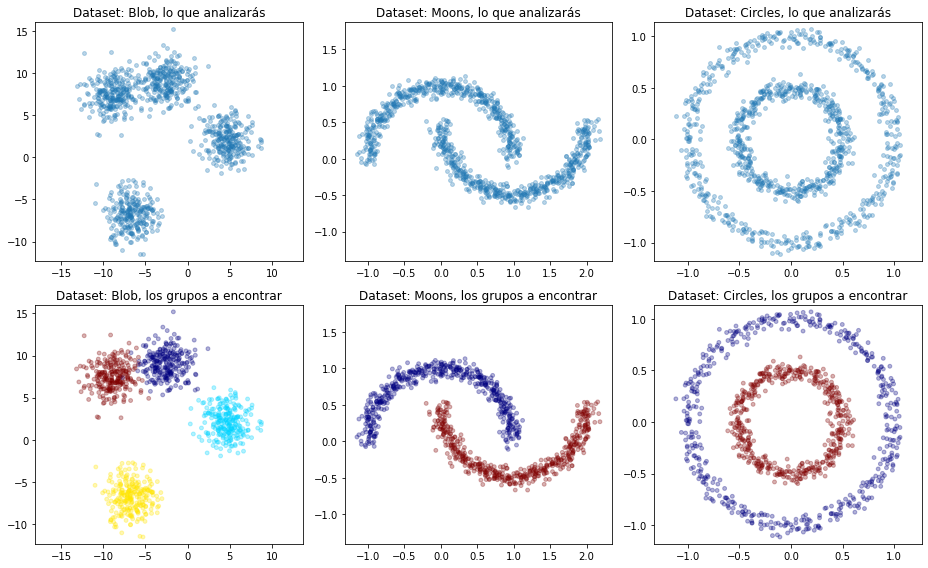

In [7]:
# NO ME FUNCIONA EN LOCAL (muere el kernel), SÍ EN GOOGLE COLAB
fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         [None] * 3 + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):
    ax.set_title('Dataset: {}, '.format(name) + ('lo que analizarás' if i < 3 else 'los grupos a encontrar'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.3, cmap='jet')
    ax.axis('equal')
plt.tight_layout()

### 1 a. K-means

En este apartado se pide probar el algoritmo *k-means* sobre los tres datasets presentados anteriormente ajustando con los parámetros adecuados y analizar sus resultados.

In [8]:
X, y = X_blobs, y_blobs

Para estimar el número de clusters a detectar por *k-means*. Una técnica para estimar $k$ es, como se explica en la teoría:
> Los criterios anteriores (minimización de distancias intra grupo o maximización de distancias inter grupo) pueden usarse para establecer un valor adecuado para el parámetro k. Valores k para los que ya no se consiguen mejoras significativas en la homogeneidad interna de los segmentos o la heterogeneidad entre segmentos distintos, deberían descartarse.

Lo que popularmente se conocer como *regla del codo*.

Primero es necesario calcular la suma de los errores cuadráticos ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consiste en la suma de todos los errores (distancia de cada punto a su centroide asignado) al cuadrado.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

Donde $K$ es el número de clusters a buscar por *k-means*, $x \in C_i$ son los puntos que pertenecen a i-ésimo cluster, $c_i$ es el centroide del cluster $C_i$ (al que pertenece el punto $x$), y $euclidean$ es la [distancia euclídea](https://en.wikipedia.org/wiki/Euclidean_distance).

Este procedimiento realizado para cada posible valor $k$, resulta en una función monótona decreciente, donde el eje $x$ representa los distintos valores de $k$, y el eje $y$ el $SSE$. Intuitivamente se podrá observar un significativo descenso del error, que indicará el valor idóneo de $k$.

**Se pide realizar la representación gráfica de la regla del codo junto a su interpretación, utilizando la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).**

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Blobs.
</div>

C:\Users\mario\anaconda3\envs\uoc20211pec1\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


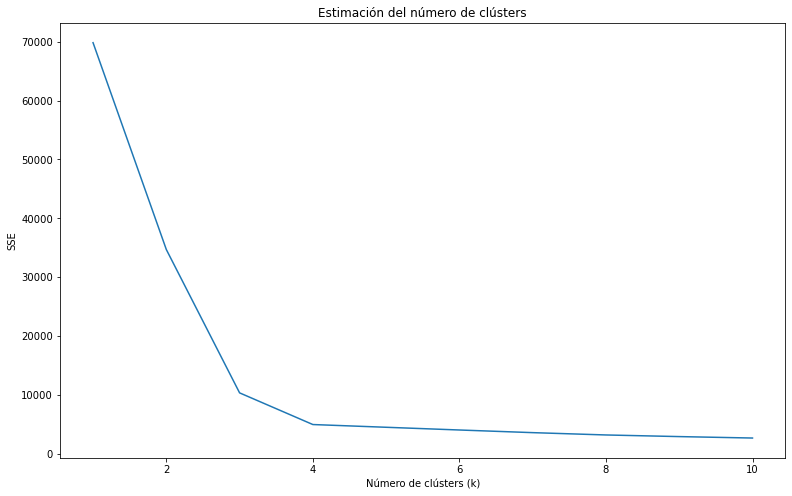

In [27]:
def sse_kmeans(X, k): 
    sse = []
    for i in range(1, k):
        kmeans = cluster.KMeans(n_clusters=i)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    return sse

def elbow_kmeans(sse, k):
    fig, ax = plt.subplots(figsize=(13, 8))
    ax.plot(range(1, k), sse)
    plt.title("Estimación del número de clústers")
    plt.xlabel("Número de clústers (k)")
    plt.ylabel("SSE")
    plt.show()

# Cálculo
k = 11
sse = sse_kmeans(X, k)

# Visualación
elbow_kmeans(sse, k)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

De la gráfica anterior podemos interpretar lo siguiente:

- El número de clústers óptimo para este dataset es de 4, es decir, elegimos como número de clústers (k) donde se produce el "codo" en la función, esto quiere decir donde la suma de los errores cuadráticos se atenúa (donde la distancia de cada punto a su centroide es menor).

Cabe destacar, que se podría elegir 3 clústers, pero este valor no sería el óptimo ya que la suma de los errores cuadráticos es mayor.

El SSE (suma de los errores cuadráticos), calcula la distancia de cada punto a su centroide, por lo que busca minimizar dicha distancia, es decir, que los clústers sean lo más compactos posibles. Otra forma de mejorar la elección de k es medir la distancia entre centroides, cuanto más distancia haya entre centroides más diferentes van a ser los clústers.

Por lo tanto, se podría hacer el cálculo de maximizar la distancia entre centroides para también mejorar la elección de k, en este caso porque en la anterior ejecución queda claro que lo mejor son 4 clústers, pero hacer este cálculo podría ayudarnos a si es mejor 3 o 5 clústers por ejemplo.


<div class="alert alert-block alert-info">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Blobs.
</div>

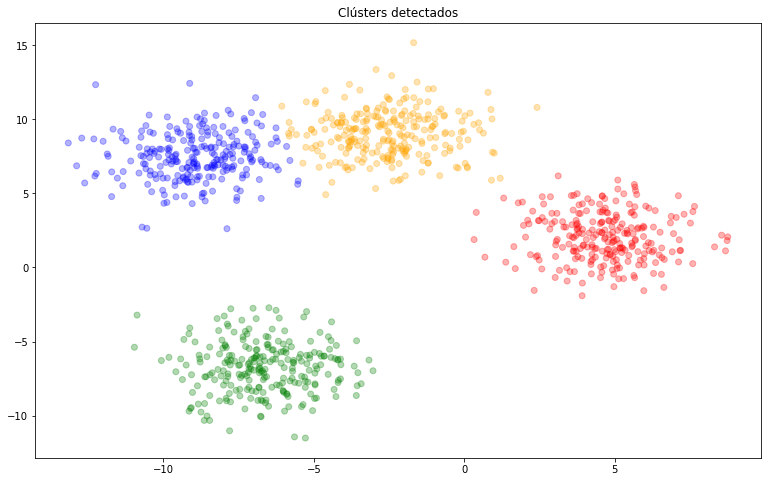

In [51]:
def clusters_view(X, labels):
    fig, ax = plt.subplots(figsize=(13, 8))
    plt.title("Clústers detectados")
    
    colores = ["blue", "red", "green", "orange"]
    labels_color = []
    for i in labels:
        labels_color.append(colores[i])
    ax.scatter(X[:,0], X[:,1], c=labels_color, alpha=.3)

# Cálculo
modelo_kmeans_blobs = cluster.KMeans(n_clusters=4, random_state=0)
modelo_kmeans_blobs.fit(X)

# Visualización
clusters_view(X, modelo_kmeans_blobs.labels_)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Como resultado de la anterior ejecución, podemos ver que tenemos 4 grupos tal y como era de esperar, ya que al inicializar kmeans el valor de k era 4.

Mencionar que los grupos obtenidos son correctos, es decir, tenemos 4 colores (4 grupos) y los puntos de un mismo color están más próximos al centro del clúster del mismo color que al centro de los otros grupos.

El resultado al ejecutar kmeans nos generá los siguientes grupos:
- Grupo arriba a la izquierda: se caracteriza porque el valor de la primera columna del dataset es pequeño, y el valor de la segunda columna es elevado.
- Grupo arriba a la derecha: se caracteriza porque el valor de la primera columna es medio y el de la segunda columna es elevado.
- Grupo abajo a la izquierda: tanto la primera columna como la segunda tienen valores pequeños.
- Grupo abajo a la derecha: en la primera columna tienen un elevado valor, mientras que en la segunda tienen un valor medio

In [ ]:
X, y = X_moons, y_moons

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Moons.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Moons.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

In [ ]:
X, y = X_circles, y_circles

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo en el dataset Circles.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> cálculo y visualización de los grupos en el dataset Circles.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

### 1 b. Algoritmos basados en densidad: DBScan

En este apartado se pide aplicar clustering por densidad como [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) a los datasets anteriores para detectar los grupos subyacentes.

In [ ]:
X, y = X_blobs, y_blobs

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> prueba la implementación de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN en scikit-learn</a> jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Blobs.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

In [ ]:
X, y = X_moons, y_moons

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> prueba la implementación de DBScan jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Moons.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

In [ ]:
X, y = X_circles, y_circles

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> prueba la implementación de DBScan jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar los grupos (y <i>outliers</i>) del dataset Circles.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

### 1 c. Algoritmos jerárquicos

En este apartado se pide visualizar mediante un [dendrograma](https://en.wikipedia.org/wiki/Dendrogram) la construcción progresiva de los grupos mediante un algoritmo jerárquico aglomerativo (estrategia *bottom-up*). Con ello se pretende encontrar un método gráfico para entender el comportamiento del algoritmo y encontrar los *clusters* deseados en cada dataset.

In [ ]:
X, y = X_blobs, y_blobs

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Blobs.<br>
Puedes importar las librerías necesarias para ello.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

In [ ]:
X, y = X_moons, y_moons

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>
prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Moons.<br>
Puedes importar las librerías necesarias para ello.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

In [ ]:
X, y = X_circles, y_circles

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>
prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permitiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma para el dataset Circles.<br>
Puedes importar las librerías necesarias para ello.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

<a id="ej2"></a>

## 2. Aplicación: generación de imágenes con reducción de dimensionalidad (3 puntos)

Es posible aplicar una amplia variedad de algoritmos para la reducción de dimensionalidad. Para ello se empleará el dataset MNIST compuesto de miles de dígitos manuscritos del 0 al 9. Donde cada imagen se compone de 784 píxeles (imágenes de 28 x 28), por lo que se parte de un número alto de dimensiones.

In [ ]:
X, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

Por lo que cada muestra (las 70k filas del dataset) se componen de 784 dimensiones:

In [ ]:
X.shape

In [ ]:
fig, axis = plt.subplots(1, 10, figsize=(12, 6))
for i, ax in enumerate(axis):
    ax.imshow(X[y == str(i)][0].reshape(28, 28), cmap='gray_r')
    ax.set_title(str(i))
    ax.axis('off')
plt.tight_layout()

Si cada algoritmo obtiene resultados distintos a la hora de reducir la dimensionalidad, ¿qué representación es más fiel a la distribución original?

Antes de reducir las 784 dimensiones originales de cada muestra a 2 para poder visualizarlas en 2 dimensiones, es muy útil conocer, o al menos intuir, la estructura en alta dimensionalidad de los datos.

Para ello se puede hacer uso del dendrograma como heurística para conocer la disposición original de los datos y comprobar si la proyección es similar a lo mostrado por el dendrograma.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> aprender una proyección a 2 dimensiones de las muestras de X con <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a> y proyectar el conjunto X a dos dimensiones. Después visualizarlo en un scatter plot.

Utiliza las etiquetas de y (el número manuscrito al que se corresponde cada muestra), en el parámetro label (en la llamada a scatter) y la función legend en la visualización para saber la clase correspondiente a cada punto e interpretar el resultado de la reducción de dimensionalidad y poder interpretar el resultado de la proyección.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué puedes interpretar de la proyección? ¿Las clases han quedado visiblemente separadas? ¿Por qué?
</div>

En la gráfica anterior cada punto representa una muestra en 2 dimensiones. Con PCA es posible <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform">invertir la transformación</a> para que, a partir de cada punto 2d, se obtenga de nuevo (aproximadamente) la imagen original (784 dimensiones).

Por lo que es posible "generar" nuevas imágenes eligiendo puntos aleatoriamente del plano 2d, y pedirle al modelo PCA aprendido que invierta la transformación para obtener las "teóricas" imágenes que habrían sido proyectadas a esos puntos del espacio proyectado.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> calcular el máximo y mínimo de cada una de las dos dimensiones y, para cada una de ellas, <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html">generar una secuencia</a> de 10 valores con igual separación.
</div>

Con las dos secuencias de 10 (una por cada dimensión del plano de proyección) valores es posible combinar los puntos de ambas secuencias para generar 100 combinaciones (puntos 2d) que teselan el plano sobre el que PCA ha proyectado las muestras.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> invertir la transformación para cada uno de los 100 puntos y visualizar su imagen asociada en una matriz de 10 x 10 imágenes (tratando de preservar su posición en el espacio proyectado).
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué puedes interpretar de las imágenes reconstruidas / interpoladas? ¿Genera números o transiciones entre números visualmente creíbles? ¿Por qué?
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Podría haberse conseguido lo mismo con <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">t-SNE</a>? ¿Por qué?
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> aprender una proyección a 2 dimensiones de las muestras de X con <a href="https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668">UMAP</a> (con los parámetros por defecto) usando la librería <a href="https://umap-learn.readthedocs.io/en/latest/">umap-learn</a> y proyectar el conjunto X a dos dimensiones. Después visualizarlo en un scatter plot.

Utiliza las etiquetas de y (el número manuscrito al que se corresponde cada muestra), en el parámetro label (en la llamada a scatter) y la función legend en la visualización para saber la clase correspondiente a cada punto e interpretar el resultado de la reducción de dimensionalidad y poder interpretar el resultado de la proyección.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué puedes interpretar de la proyección? ¿Las clases han quedado visiblemente separadas? ¿Por qué?
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> al igual que anteriormente con PCA, calcula el máximo y mínimo para cada una de las dos dimensiones e invierte la transformación con el modelo aprendido por UMAP para cada uno de los 100 puntos y visualizar su imagen asociada en una matriz de 10 x 10 imágenes (tratando de preservar su posición en el espacio proyectado).
    
<strong>Consejo</strong>: la inversión de la transformación en UMAP es más costosa computacionalmente que con PCA, por lo que recomiendo que sólo la invoques una vez con las 100 muestras en lugar de hacer 100 llamadas (una por cada muestra). Esto reduce drácticamente el tiempo de ejecución.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> ¿Qué puedes interpretar de las imágenes reconstruidas / interpoladas? ¿Genera números o transiciones entre números visualmente creíbles? ¿Por qué?
</div>

<a id="ej3"></a>

## 3. Aplicación: identificación de puntos de interés turísticos (3 puntos)

En este ejercicio se busca automatizar la localización de lugares turísticos a través de los metadatos de las fotografías de flickr.

Para ello se provee junto a la PEC el dataset: ``barcelona.csv``. Ya que se pide encontrar los puntos de mayor interés turístico de esta ciudad.

**Opcional: si quieres hacerlo para otra región**

Pero si quieres hacerlo para otra parte del mundo, puedes descargarte el dataset completo [aquí](https://drive.google.com/file/d/0B-mRR4rjwHPONVFfX2VmTmxZcHM/view?usp=sharing) y descomprime para extraer el *CSV*.

Para seleccionar las coordenadas de la zona de interés puedes usar la opción *Export* manual de [OpenStreetMaps](https://www.openstreetmap.org/).

Por último, para filtrar los datos que se corresponden a la zona deseada puedes usar el programa *AWK* mediante la siguiente línea:

``awk -F"," 'NR == 1 {print $5","$6} (NR > 1 && $5 > 41.3560 && $5 < 41.4267 && $6 > 2.1300 && $6 < 2.2319) {print $5","$6}' photo_metadata.csv``

``$5`` hace referencia a la latitud, y ``$6`` a la longitud. Sustituye los valores mínimo y máximo para obtener los datos de localización referentes a tu área de interés.

In [ ]:
geo_df = pd.read_csv('barcelona.csv', header=0)
geo_df.sample(5)

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> siempre que tratamos un problema real, es necesario entender los datos a tratar. Visualiza las localizaciones de las fotografías mediante un scatter plot. Prueba distintos parámetros de tamaño (<i>size</i>) <i>s</i>, y opacidad <i>alpha</i> hasta conseguir un resultado fácil de interpretar. 
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> tras haber probado los algoritmos de agrupamiento en el ejercicio 1. ¿Qué algoritmo crees que sería más adecuado tras visualizar los datos? ¿Por qué?
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> para prototipar el modelado primero se recomienda elegir un subconjunto de los datos que sea representativo. Selecciona una muestra del DataFrame original y visualiza como en el punto anterior para comprobar su similitud. 
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> ajusta el algoritmo de clustering elegido para encontrar los distintos grupos sobre el conjunto reducido, y visualiza el resultado coloreando cada punto en base al grupo al que pertenece. Como pista, alrededor de 20 clusters es un número razonable, y es posible darles un color distinto a cada uno con el <i>colormap: tab20</i>.
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> si has usado un método de <i>clustering</i> que permite la detección de <i>outliers</i>. Representa sólo los puntos que no ha considerado <i>outliers</i>, es decir, los que pertenecen a algún <i>cluster</i>.
</div>

<div class="alert alert-block alert-info">
<strong>Análisis:</strong> interpreta cual es el lugar que representa cada <i>cluster</i> (si encuentras una asociación lógica).
</div>

<div class="alert alert-block alert-info">
<strong>OPCIONAL Implementación:</strong> representa los puntos sin ruido sobre un mapa utilizando la librería <a href="https://pypi.org/project/smopy/">Smopy</a>. Para facilitar la interpretación, puedes representar cada cluster como el punto medio de todos los puntos que lo conforman.
</div>